In [1]:
# BiocManager::install("scran")

In [7]:
library(SingleCellExperiment)
library(scran)
library(scater)

In [8]:
filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/covid/atlas_E8.5.Rds"

In [9]:
sce = readRDS(filename)
sce

class: SingleCellExperiment 
dim: 29452 20978 
metadata(1): log.exprs.offset
assays(2): counts logcounts
rownames(29452): ENSMUSG00000051951 ENSMUSG00000089699 ...
  ENSMUSG00000096730 ENSMUSG00000095742
rowData names(3): ID Symbol SymbolUniq
colnames(20978): AAACATACCACTGA-17 AAACATTGCAACTG-17 ...
  TTTCTACTTCTCTA-37 TTTGCATGCTGATG-37
colData names(30): Sample Barcode ... endo_gutDPT endo_gutCluster
reducedDimNames(0):
spikeNames(0):
altExpNames(0):

In [10]:
names(colData(sce))

[1] "Sample"              "Barcode"             "source"             
 [4] "barcode"             "sample"              "stage"              
 [7] "sequencing.batch"    "theiler"             "doub.density"       
[10] "doublet"             "cluster"             "cluster.sub"        
[13] "cluster.stage"       "cluster.theiler"     "stripped"           
[16] "celltype"            "colour"              "umapX"              
[19] "umapY"               "haem_gephiX"         "haem_gephiY"        
[22] "haem_subclust"       "endo_gephiX"         "endo_gephiY"        
[25] "endo_trajectoryName" "endo_trajectoryDPT"  "endo_gutX"          
[28] "endo_gutY"           "endo_gutDPT"         "endo_gutCluster"

In [11]:
assay(sce, "logcounts") <- NULL
sizeFactors(sce) <- NULL

In [12]:
# sce1 = sce[,1:10500]
# sce2 = sce[,10501:20978]

In [13]:
sce1 = sce[,sce$sample == '17']
sce2 = sce[,sce$sample == '29']

In [14]:
sce1

class: SingleCellExperiment 
dim: 29452 4483 
metadata(1): log.exprs.offset
assays(1): counts
rownames(29452): ENSMUSG00000051951 ENSMUSG00000089699 ...
  ENSMUSG00000096730 ENSMUSG00000095742
rowData names(3): ID Symbol SymbolUniq
colnames(4483): AAACATACCACTGA-17 AAACATTGCAACTG-17 ...
  TTTGCATGAACGGG-17 TTTGCATGAGGAGC-17
colData names(30): Sample Barcode ... endo_gutDPT endo_gutCluster
reducedDimNames(0):
spikeNames(0):
altExpNames(0):

In [15]:
sce2

class: SingleCellExperiment 
dim: 29452 7569 
metadata(1): log.exprs.offset
assays(1): counts
rownames(29452): ENSMUSG00000051951 ENSMUSG00000089699 ...
  ENSMUSG00000096730 ENSMUSG00000095742
rowData names(3): ID Symbol SymbolUniq
colnames(7569): AAACATACAAAGCA-29 AAACATACGATACC-29 ...
  TTTGCATGTCCTCG-29 TTTGCATGTTGTCT-29
colData names(30): Sample Barcode ... endo_gutDPT endo_gutCluster
reducedDimNames(0):
spikeNames(0):
altExpNames(0):

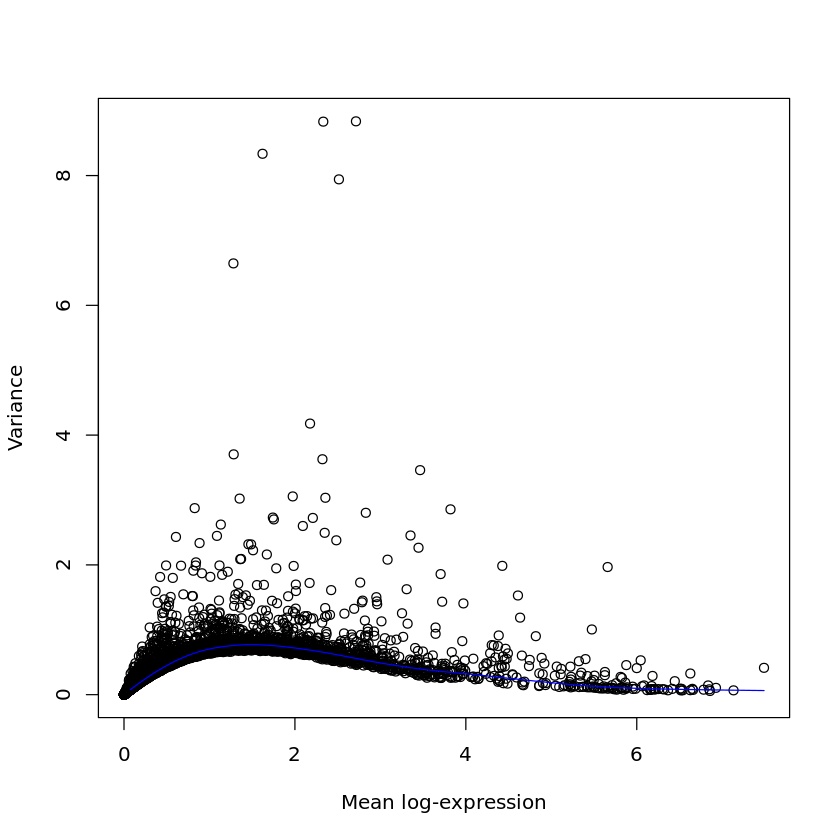

In [16]:
sce = sce1
sce <- logNormCounts(sce)
dec1 <- modelGeneVar(sce)
plot(dec1$mean, dec1$total, xlab="Mean log-expression", ylab="Variance")
curve(metadata(dec1)$trend(x), col="blue", add=TRUE)

In [17]:
sce1 = sce

In [18]:
sce = sce2
sce <- logNormCounts(sce)
dec2 <- modelGeneVar(sce)

In [19]:
dec = dec2
dec = dec[order(dec$mean),]
selected_genes = c(names(head(dec$mean[dec$mean>0.1],1)),
names(head(dec$mean[dec$mean>0.5],1)),
names(head(dec$mean[dec$mean>1],1)),
names(head(dec$mean[dec$mean>1.5],1)),
names(head(dec$mean[dec$mean>2],1)),
names(head(dec$mean[dec$mean>2.5],1)),
names(head(dec$mean[dec$mean>3],1)),
names(head(dec$mean[dec$mean>4],1)),
names(head(dec$mean[dec$mean>5],1)),
names(head(dec$mean[dec$mean>6],1)))
dec2 = dec
selected_genes

[1] "ENSMUSG00000038146" "ENSMUSG00000000355" "ENSMUSG00000016503"
 [4] "ENSMUSG00000020368" "ENSMUSG00000032366" "ENSMUSG00000021361"
 [7] "ENSMUSG00000006699" "ENSMUSG00000022283" "ENSMUSG00000024661"
[10] "ENSMUSG00000043716"

In [20]:
sce = sce[selected_genes,]
sce
assay(sce, "logcounts") <- NULL
sce

class: SingleCellExperiment 
dim: 10 7569 
metadata(1): log.exprs.offset
assays(2): counts logcounts
rownames(10): ENSMUSG00000038146 ENSMUSG00000000355 ...
  ENSMUSG00000024661 ENSMUSG00000043716
rowData names(3): ID Symbol SymbolUniq
colnames(7569): AAACATACAAAGCA-29 AAACATACGATACC-29 ...
  TTTGCATGTCCTCG-29 TTTGCATGTTGTCT-29
colData names(30): Sample Barcode ... endo_gutDPT endo_gutCluster
reducedDimNames(0):
spikeNames(0):
altExpNames(0):

class: SingleCellExperiment 
dim: 10 7569 
metadata(1): log.exprs.offset
assays(1): counts
rownames(10): ENSMUSG00000038146 ENSMUSG00000000355 ...
  ENSMUSG00000024661 ENSMUSG00000043716
rowData names(3): ID Symbol SymbolUniq
colnames(7569): AAACATACAAAGCA-29 AAACATACGATACC-29 ...
  TTTGCATGTCCTCG-29 TTTGCATGTTGTCT-29
colData names(30): Sample Barcode ... endo_gutDPT endo_gutCluster
reducedDimNames(0):
spikeNames(0):
altExpNames(0):

In [21]:

sce <- logNormCounts(sce)
rowMeans(logcounts(sce))

ENSMUSG00000038146 ENSMUSG00000000355 ENSMUSG00000016503 ENSMUSG00000020368 
         0.1000019          0.5001725          1.0006622          1.5007354 
ENSMUSG00000032366 ENSMUSG00000021361 ENSMUSG00000006699 ENSMUSG00000022283 
         2.0029230          2.5019724          3.0016312          4.0104908 
ENSMUSG00000024661 ENSMUSG00000043716 
         5.0043360          6.0012704

In [22]:
sce2 = sce

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"add" is not a graphical parameter”

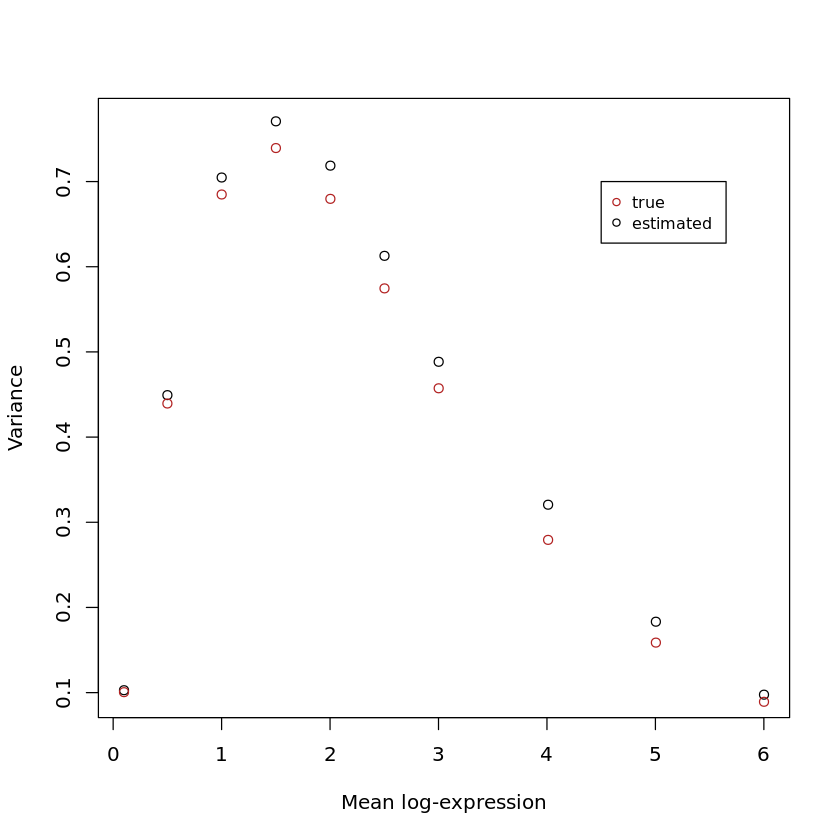

In [27]:
# plot(dec1$mean, metadata(dec1)$trend(dec1$mean))
plot(rowMeans(logcounts(sce2)), metadata(dec1)$trend(rowMeans(logcounts(sce2))),
    xlab="Mean log-expression", ylab="Variance")
dec2 = dec2[selected_genes,]
points(dec2$mean, metadata(dec2)$trend(dec2$mean), add = T, col = "firebrick")
# points(dec1[selected_genes,]$mean, metadata(dec2)$trend(dec1[selected_genes,]$mean), add = T, col = "cornflowerblue")

legend(4.5,0.7, legend=c("true", "estimated"),
       col=c("firebrick", "black"),pch=c(1,1), cex=0.8)

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"add" is not a graphical parameter”Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"add" is not a graphical parameter”

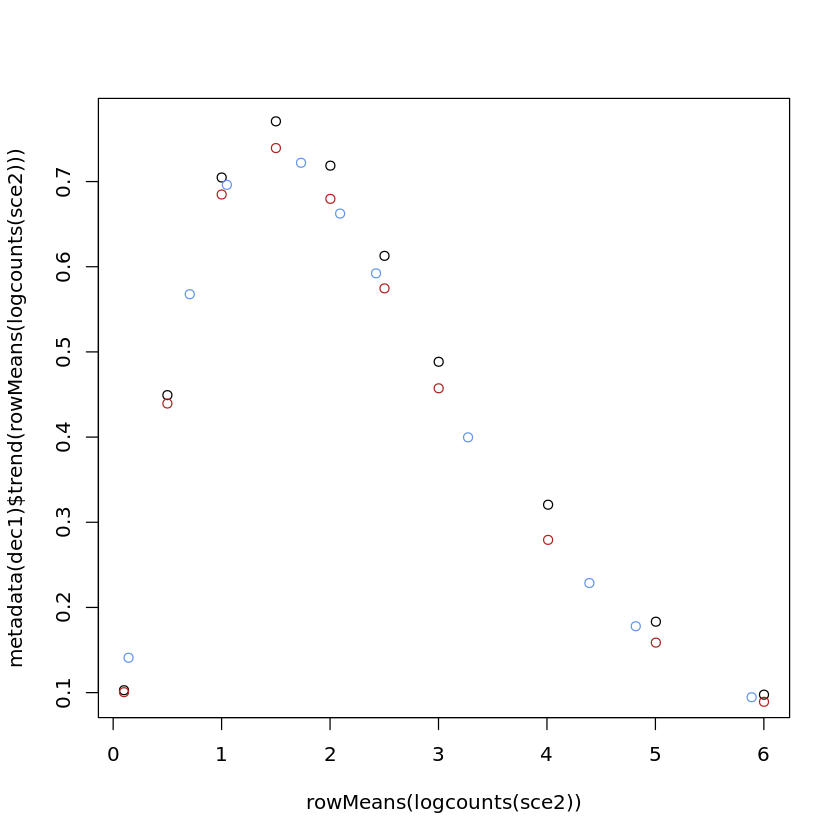

In [24]:
# plot(dec1$mean, metadata(dec1)$trend(dec1$mean))
plot(rowMeans(logcounts(sce2)), metadata(dec1)$trend(rowMeans(logcounts(sce2))))
dec2 = dec2[selected_genes,]
points(dec2$mean, metadata(dec2)$trend(dec2$mean), add = T, col = "firebrick")
points(dec1[selected_genes,]$mean, metadata(dec2)$trend(dec1[selected_genes,]$mean), add = T, col = "cornflowerblue")